Dados: Vendas de casas baseado em caracteristicas

In [1]:
import pandas as pd

dados = pd.read_csv("Preços_de_casas.csv")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [2]:
#Removendo ID ja que não vai ser relevante pra analise
dados = dados.drop(columns="Id")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area_primeiro_andar             1438 non-null   float64
 1   existe_segundo_andar            1438 non-null   int64  
 2   area_segundo_andar              1438 non-null   float64
 3   quantidade_banheiros            1438 non-null   int64  
 4   capacidade_carros_garagem       1438 non-null   int64  
 5   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 6   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 78.8 KB


#correlação com o preço de venda, sendo que quanto maior esse número, mais correlacionada está a característica com o preço de venda, essa métrica varia entre -1 e 1. (intencidade e direção)

***Intensidade: refere-se à força da relação entre as variáveis medidas. Pode variar de -1 a +1, onde -1 indica uma correlação perfeitamente negativa, +1 indica uma correlação perfeitamente positiva e 0 indica ausência de correlação linear.***

***Direção: refere-se à natureza da relação entre as variáveis medidas. Uma correlação positiva indica que as variáveis aumentam ou diminuem juntas, enquanto uma correlação negativa indica que uma variável aumenta enquanto a outra diminui, ou vice-versa.***

In [3]:
corr = dados.corr()
corr["preco_de_venda"]

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

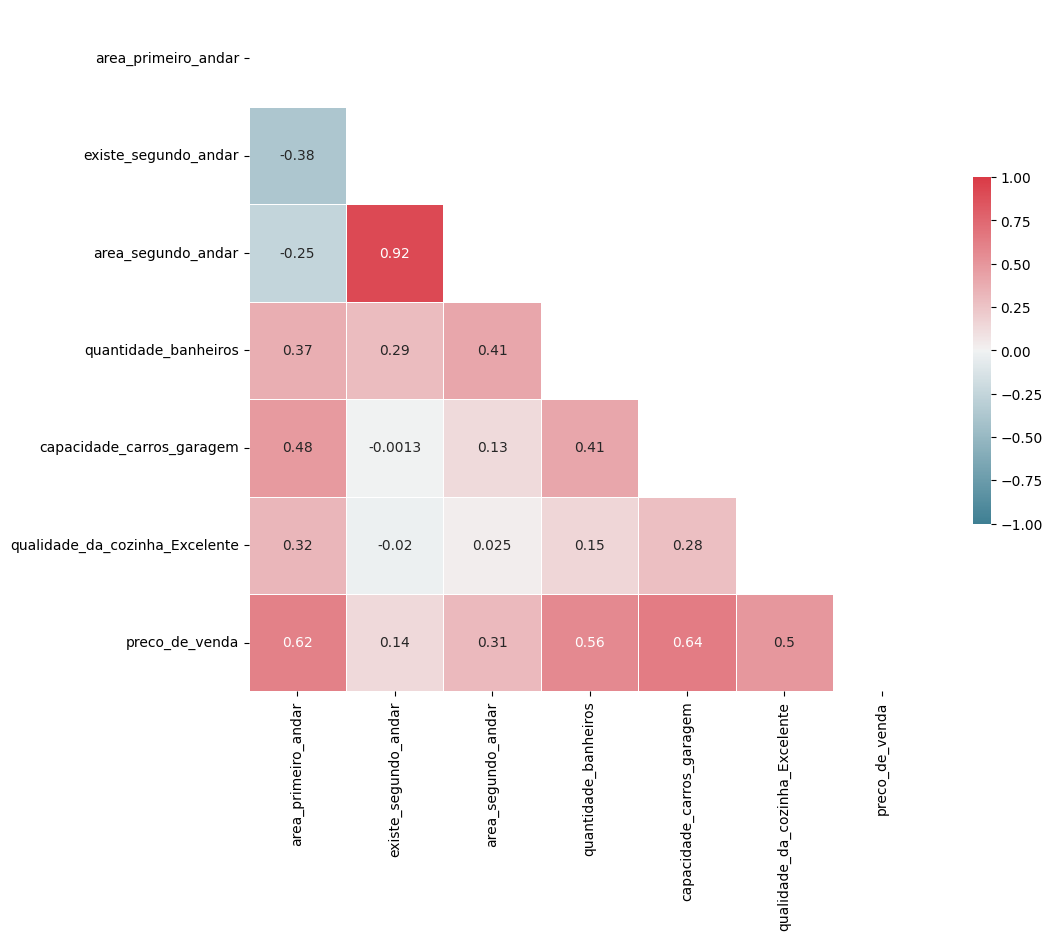

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

In [5]:
#Usando outro grafico
import plotly.express as px

Text(0, 0.5, 'preço de venda')

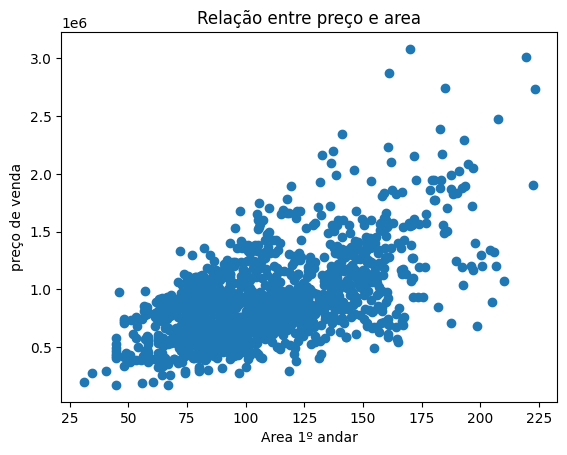

In [6]:
# Como é a relação entre área construída e o preço do imóvel?
plt.scatter(dados["area_primeiro_andar"], dados["preco_de_venda"])
plt.title("Relação entre preço e area")
plt.xlabel("Area 1º andar")
plt.ylabel("preço de venda")

Text(0, 0.5, 'Preço de venda')

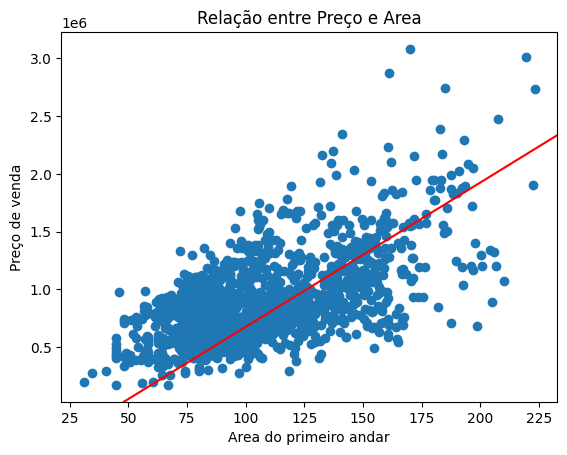

In [7]:
# Aparentemente, quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1=(66, 250000), xy2=(190, 1800000), color= "red") #Criando reta no grafico
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")

In [8]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override="red", trendline = 'ols' )

In [9]:
# import train_test_split
from sklearn.model_selection import train_test_split
#Definindo y eX
y = dados['preco_de_venda']
X = dados.drop(columns = 'preco_de_venda')

In [10]:
#Aplicando o split do y e x
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state= 230)

In [11]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data= X_train) 
df_train['preco_de_venda'] = Y_train

In [12]:
#import ols
from statsmodels.formula.api import ols

In [13]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

Dividimos o conjunto de dados em duas partes: uma para treinamento e outra para teste

In [14]:
# visualizando os parametros
modelo_0.params

Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

Como podemos interpretar esse coeficiente? Seu valor está expresso em reais (R$), considerando que a unidade de medida do preço de venda também está em reais. Isso significa que, em média, um aumento de 1 metro quadrado na área do primeiro andar está associado a um acréscimo de R$ 6.793 no valor da casa.

In [15]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          2.22e-105
Time:                        23:28:18   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

In [16]:
# observando o R²
print(modelo_0.rsquared)

0.3772801099429788


In [17]:
# Quais são os resíduos
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

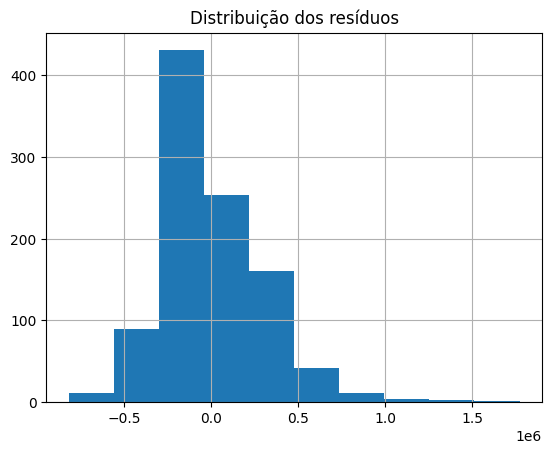

In [18]:
# Como eles estão distribuídos
modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

In [19]:
# definindo o y previsto
y_predict = modelo_0.predict(X_test)

In [20]:
# importando o r2 score
from sklearn.metrics import r2_score

In [21]:
#printando o R² 
print("R²: ", r2_score(Y_test,y_predict))

R²:  0.38530928723202407


Ao voltarmos e verificarmos o R² do treinamento, que foi de 0.37, notamos que os valores de 0.37 e 0.38 estão bastante próximos. Isso sugere que o modelo está se comportando de maneira consistente tanto nos dados de treinamento quanto nos dados de teste, e restam 62% da variação que não é explicada por essa variável.

"Resumo rapido"

leitura de dados, cria~ção de heatmap, grafico de disperção sem e com linha utilizando 2 modelos, ultilização de ols , utlizando nosso treino pra predição